# Plot Breakdown of CASA and PL Timings

The goal here is to plot the breakdown of the PL timings into individual CASA tasks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
import pandas as pd
import pickle
from importlib import reload
import parse_logs

## read in data files

In [2]:
wsu_cycle7 = Table.read('data/wsu_datarates_mit_per_mous_cycle7_20230128.ecsv')
wsu_cycle8 = Table.read('data/wsu_datarates_mit_per_mous_cycle8_20230128.ecsv')

In [3]:
wsu_cycle7.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_frac_bw_early','wsu_frac_bw_later_2x','wsu_frac_bw_later_4x','wsu_frac_bw_spw','nbase_typical','nbase_array','nbase_all','L80','Project','SB_name','blc_tint','blc_ntunings','bp_time','flux_time','phase_time','pol_time','check_tim

In [4]:
wsu_db = vstack([wsu_cycle7,wsu_cycle8])

In [37]:
reload(parse_logs)

<module 'parse_logs' from '/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/parse_logs.py'>

In [97]:
casa_cycle7 = parse_logs.convert_to_astropy('data/cycle7_pl_casa_timings_20230124.pkl',
                                           dump_rows=['uid://A001/X1465/X3d1e','uid://A001/X1465/X3102','uid://A001/X1477/X41'])

In [98]:
casa_cycle7.columns

<TableColumns names=('mous','casaversion','pipeStartTime','recipe','casatasks','importasdm','flagdata','listobs','plotms','clearstat','flagcmd','gencal','plotbandpass','wvrgcal','gaincal','bandpass','setjy','flagmanager','applycal','plotms_mpi','fluxscale','casatools','imager.selectvis','imager.advise','imager.apparentsens','tclean_mpi','tclean','pipeEndTime','exportfits','mstransform','imhead','immoments','imstat','imsubimage','makemask','ia.getprofile','immath','uvcontfit','pipetime','visstat')>

In [99]:
reload(parse_logs)

<module 'parse_logs' from '/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/parse_logs.py'>

In [100]:
casa_cycle8 = parse_logs.convert_to_astropy('data/cycle8_pl_casa_timings_20230124.pkl',dump_rows=['uid://A001/X1590/X2da5'])

In [101]:
casa_cycle8.columns

<TableColumns names=('mous','casaversion','pipeStartTime','recipe','casatasks','importasdm','flagdata','listobs','plotms','clearstat','flagcmd','gencal','plotbandpass','gaincal','bandpass','setjy','flagmanager','applycal','plotms_mpi','fluxscale','casatools','imager.selectvis','imager.advise','imager.apparentsens','tclean_mpi','tclean','pipeEndTime','exportfits','mstransform','imhead','immoments','imstat','imsubimage','makemask','ia.getprofile','immath','uvcontfit','pipetime','wvrgcal','visstat','pipeline.hif.heuristics.imageparams_base::imager::setDataOnThisMS')>

In [102]:
casa_cycle8.remove_column('pipeline.hif.heuristics.imageparams_base::imager::setDataOnThisMS')

In [104]:
casa_db = vstack([casa_cycle7,casa_cycle8])

# Distribution of Pipeline run times

In [12]:
np.unique(wsu_db['procedure'])

--
hifa_calimage
hifa_calimage_renorm
hifa_image


In [13]:
np.unique(wsu_cycle7['procedure'])

--
hifa_calimage
hifa_calimage_renorm
hifa_image


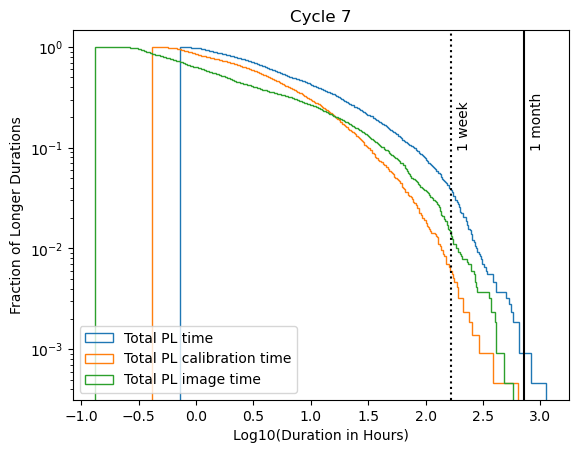

In [14]:
reload(parse_logs)
idx = (wsu_cycle7['procedure'] == 'hifa_calimage') | (wsu_cycle7['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_timedist(wsu_cycle7[idx],plot_title='Cycle 7',figname='plots_pl/pl_duration_distribution_cycle7.png')

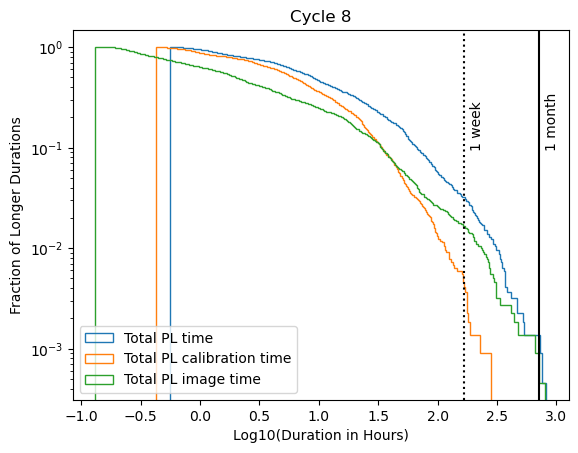

In [15]:
reload(parse_logs)
idx = (wsu_cycle8['procedure'] == 'hifa_calimage') | (wsu_cycle8['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_timedist(wsu_cycle8[idx],plot_title='Cycle 8',figname='plots_pl/pl_duration_distribution_cycle8.png')

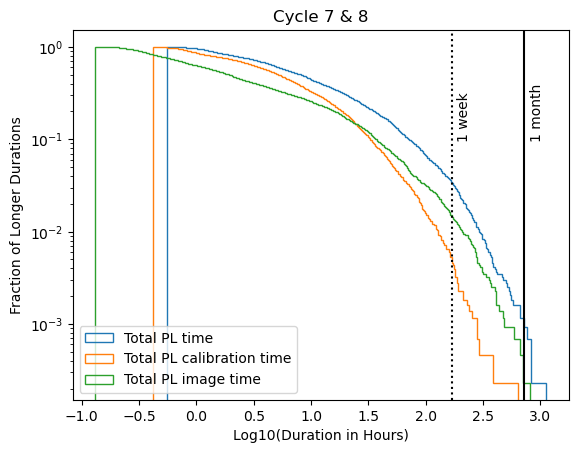

In [16]:
reload(parse_logs)
idx = (wsu_db['procedure'] == 'hifa_calimage') | (wsu_db['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_timedist(wsu_db[idx],plot_title='Cycle 7 & 8',figname='plots_pl/pl_duration_distribution_cycle7_cycle8.png')

/Users/akepley/Dropbox/Support/naasc/WSU/big_cubes/parse_logs.py:491: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(mytab['pl_fctime']),cumulative=-1, histtype='step',


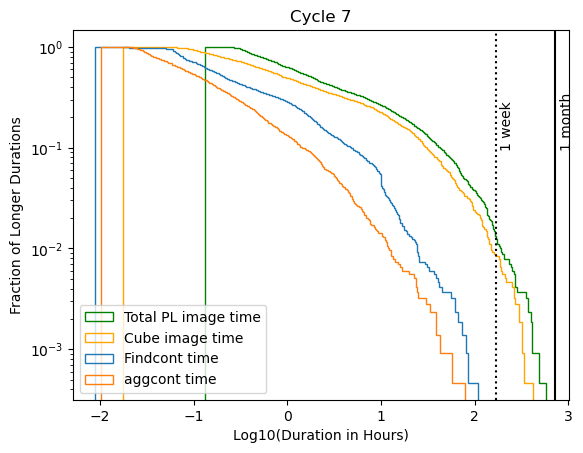

In [17]:
reload(parse_logs)
idx = (wsu_cycle7['procedure'] == 'hifa_calimage') | (wsu_cycle7['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_imgtime_breakdown(wsu_cycle7[idx],plot_title='Cycle 7',
                                  figname='plots_pl/pl_img_duration_distribution_cycle7.png')

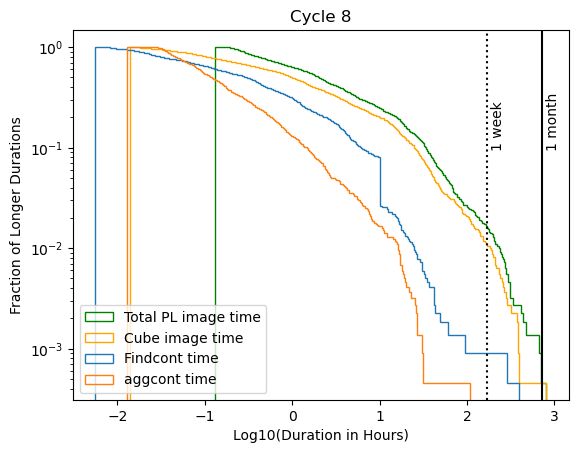

In [18]:
reload(parse_logs)
idx = (wsu_cycle8['procedure'] == 'hifa_calimage') | (wsu_cycle8['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_imgtime_breakdown(wsu_cycle8[idx],plot_title='Cycle 8',
                                  figname='plots_pl/pl_img_duration_distribution_cycle8.png')

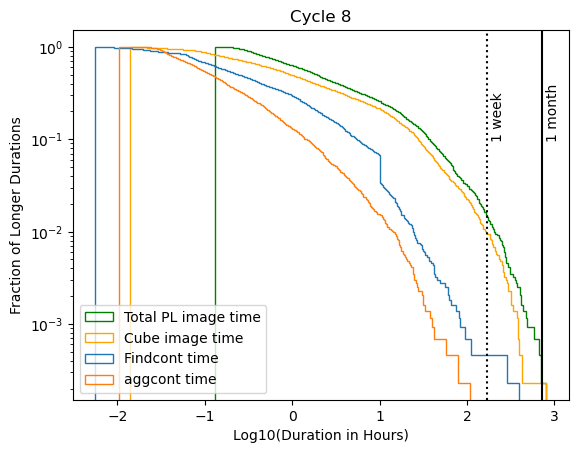

In [19]:
reload(parse_logs)
idx = (wsu_db['procedure'] == 'hifa_calimage') | (wsu_db['procedure'] == 'hifa_calimage_renorm')
parse_logs.plot_imgtime_breakdown(wsu_db[idx],plot_title='Cycle 8',
                                  figname='plots_pl/pl_img_duration_distribution_cycle7_cycle8.png')

## Plot Fraction of Calibration and Imaging Time

/Users/akepley/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  arr.partition(
/Users/akepley/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


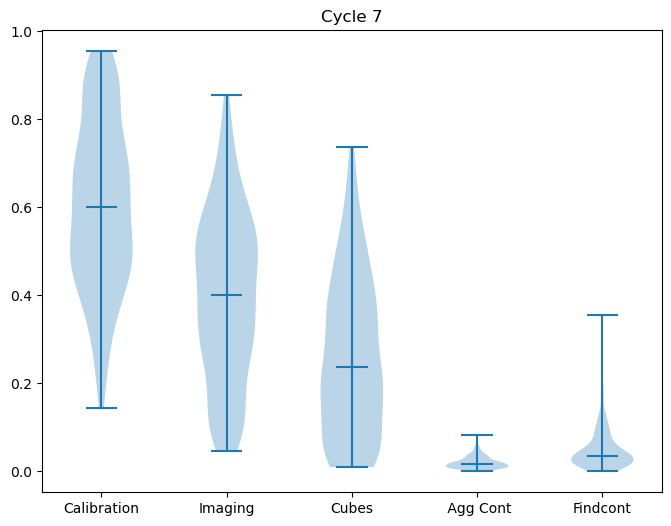

In [44]:
reload(parse_logs)
parse_logs.plot_cal_img_time(wsu_cycle7,plot_title='Cycle 7')

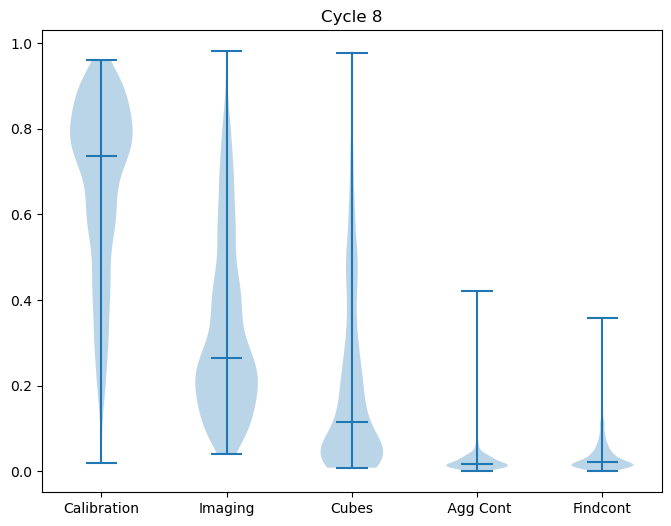

In [45]:
reload(parse_logs)
parse_logs.plot_cal_img_time(wsu_cycle8,plot_title='Cycle 8')

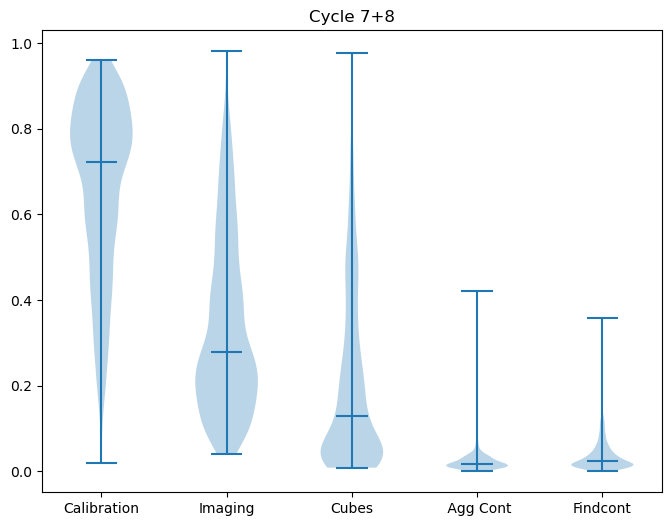

In [46]:
reload(parse_logs)
parse_logs.plot_cal_img_time(wsu_db,plot_title='Cycle 7+8')

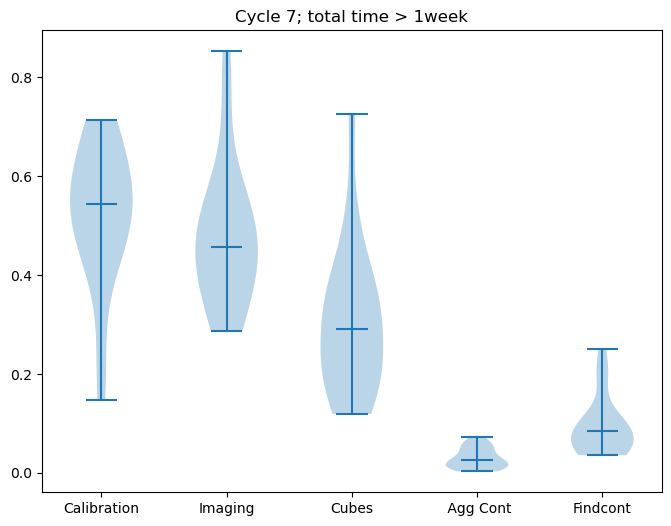

In [47]:
idx = wsu_cycle7['pl_totaltime'] > 168.
parse_logs.plot_cal_img_time(wsu_cycle7[idx],plot_title='Cycle 7; total time > 1week')

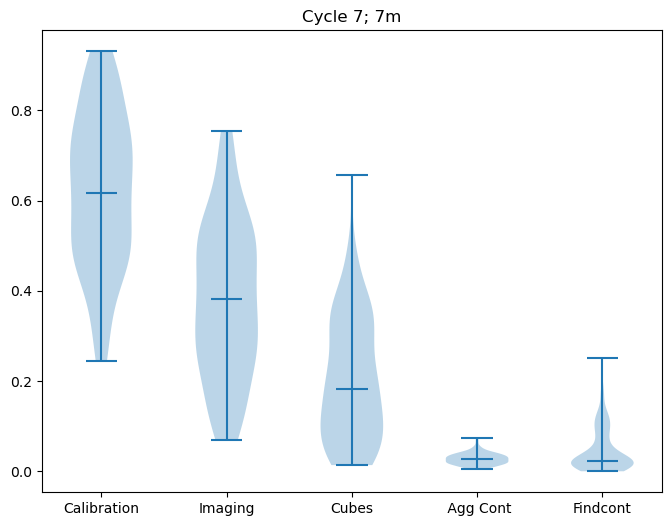

In [48]:
idx = wsu_cycle7['array'] == '7m'
parse_logs.plot_cal_img_time(wsu_cycle7[idx],plot_title='Cycle 7; 7m')

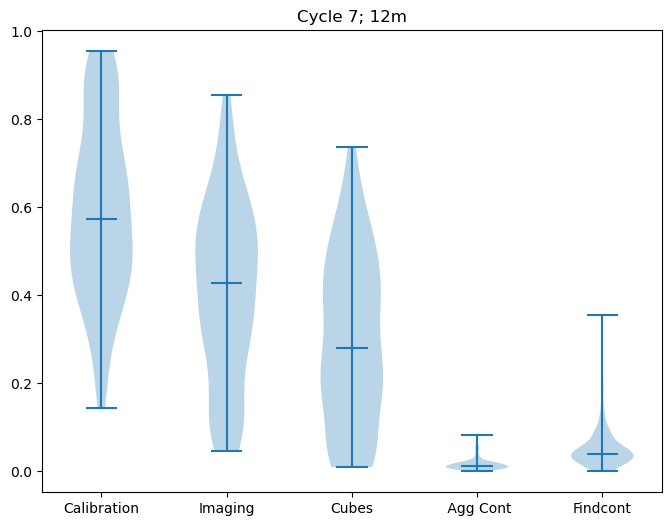

In [49]:
idx = wsu_cycle7['array'] == '12m'
parse_logs.plot_cal_img_time(wsu_cycle7[idx],plot_title='Cycle 7; 12m')

## Plot Fraction of CASA  time, CASA task, CASA tool

In [67]:
import parse_logs

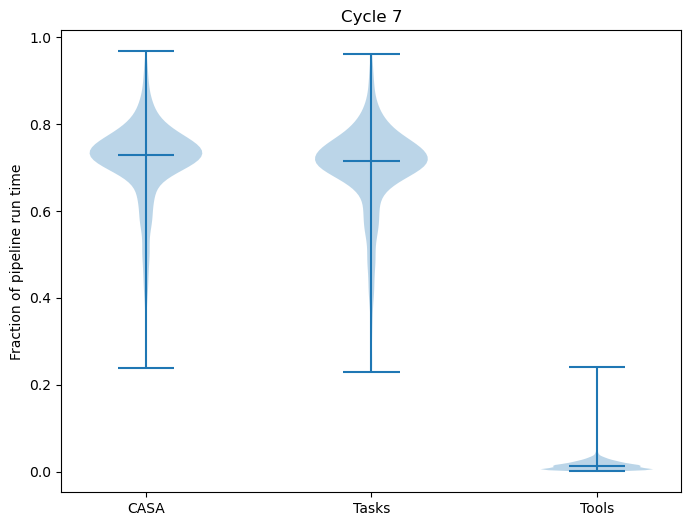

In [120]:
reload(parse_logs)
parse_logs.plot_casa_time(casa_cycle7, plot_title='Cycle 7')

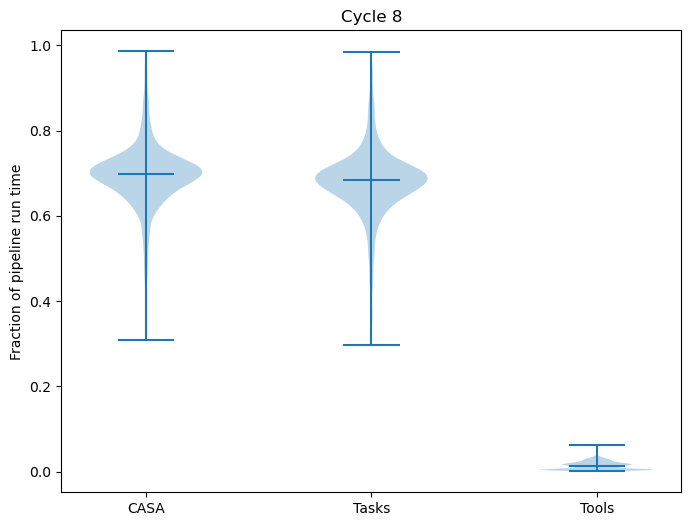

In [121]:
reload(parse_logs)
parse_logs.plot_casa_time(casa_cycle8, plot_title='Cycle 8')

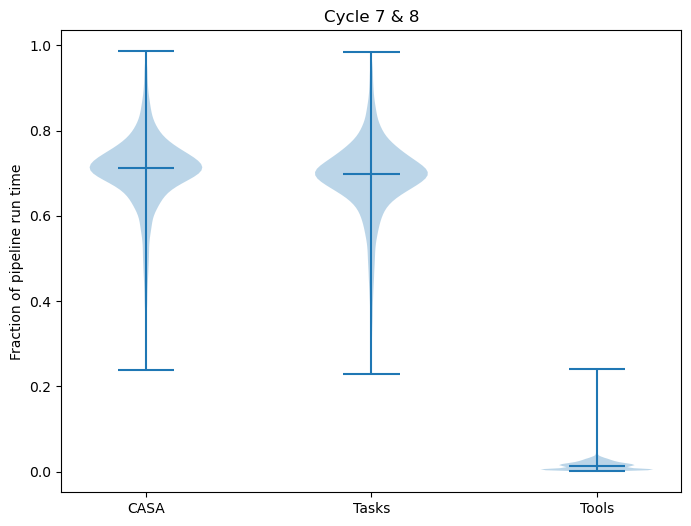

In [122]:
reload(parse_logs)
parse_logs.plot_casa_time(casa_db, plot_title='Cycle 7 & 8',figname='plots_pl/pl_casa_tasks_tools.png')

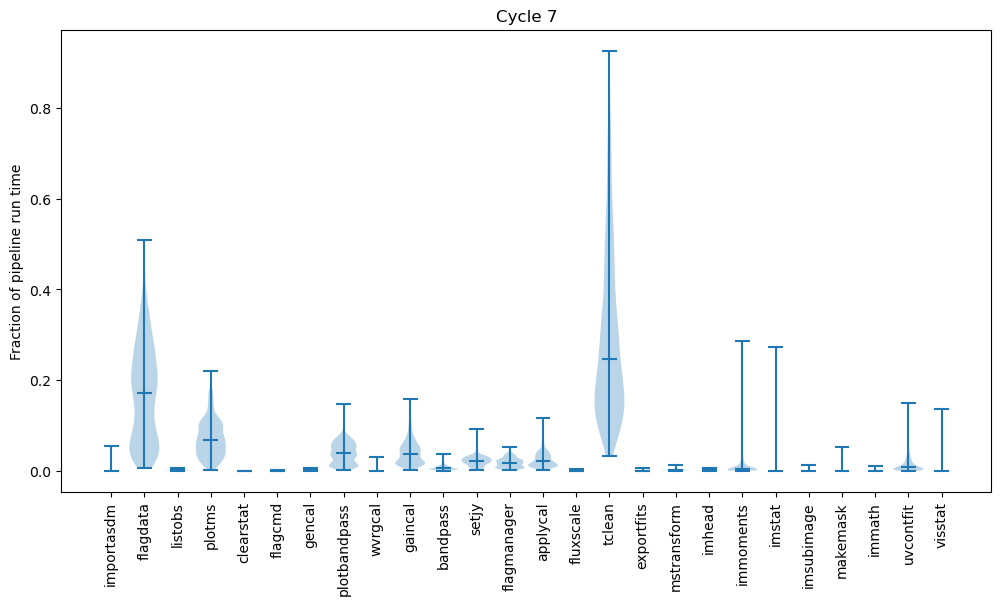

In [123]:
reload(parse_logs)
parse_logs.plot_casa_task_time(casa_cycle7,plot_title='Cycle 7')

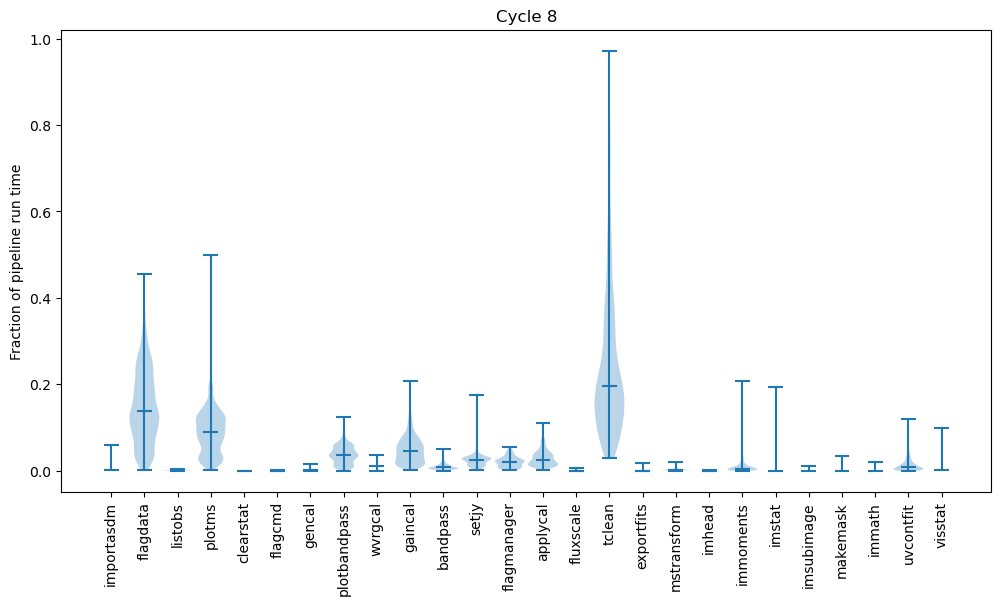

In [124]:
reload(parse_logs)
parse_logs.plot_casa_task_time(casa_cycle8,plot_title='Cycle 8')

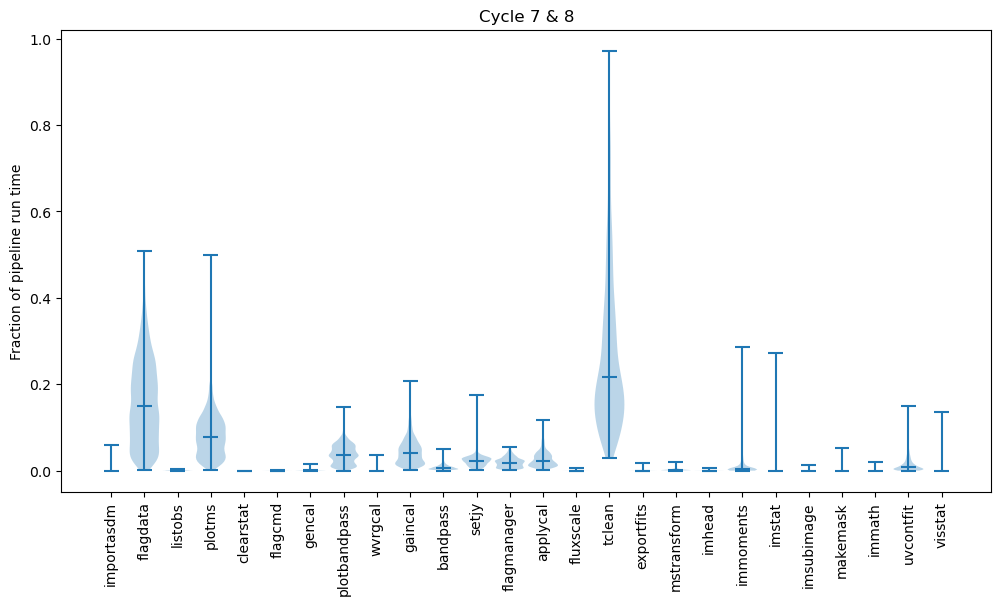

In [125]:
reload(parse_logs)
parse_logs.plot_casa_task_time(casa_db,plot_title='Cycle 7 & 8',
                               figname='plots_pl/casa_task_breakdown_cycle7_cycle8.png')

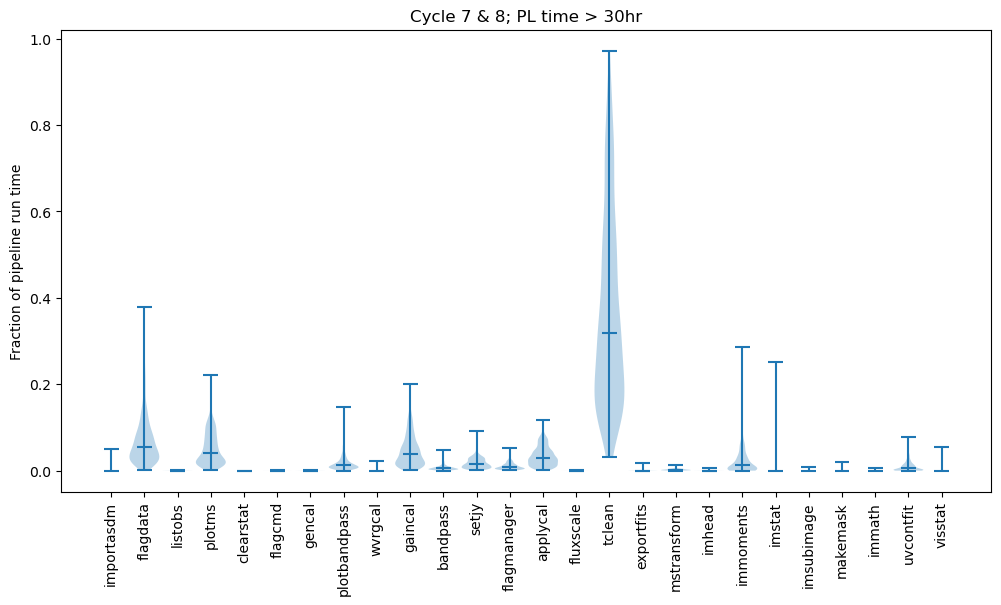

In [126]:
reload(parse_logs)
idx = casa_db['pipetime'] > 60.0 * 60.0 * 30.0 # s -> hr
parse_logs.plot_casa_task_time(casa_db[idx],plot_title='Cycle 7 & 8; PL time > 30hr')